In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Intento de análisis y clustering de descripciones

In [2]:
avisos_detalle = pd.read_csv('/home/luciano/orga-datos/datos_preprocesados/fiuba_6_avisos_detalle.csv')
avisos_detalle = avisos_detalle.drop(axis=1, labels=['idpais', 'nombre_zona', 'ciudad', 
    'mapacalle', 'tipo_de_trabajo', 'nivel_laboral', 'nombre_area', 'denominacion_empresa'])

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import descripcion_parser as dp

In [4]:
avisos_detalle['descripcion'] = avisos_detalle['descripcion'].map(dp.parse)

In [5]:
avisos_detalle

,idaviso,titulo,descripcion
0,1001284385,Dejanos tu CV,interesado grupo marias ingresa dejanos datos
1,1110092955,para línea de producción (ref. 28376),empresas vinculadas industria automotriz zarat...
2,1110092958,para mantenimiento (ref. 27181),empresas vinculadas industria automotriz zarat...
3,1110391074,Trabajá con nosotros,invitamos formar equipo coca cola andina argen...
4,1110669632,Técnico de Mantenimiento,experiencia fabricas cosmeticas alimenticias f...
5,1110843523,Cajero,encontramos busqueda cajeros experiencia super...
6,1110884778,Choferes,encontramos busqueda chofer reparto brindar se...
7,1110921809,Empleados para Limpieza,encontramos busqueda personal limpieza referen...
8,1110951631,Mecánico - (Mecánica Pesada),encontramos busqueda mecanico automotriz mecan...
9,1111617434,Finance Business Partner,division reclutamiento seleccion evaluaciones ...


In [7]:
palabras = {}
def sumar(x):
    global palabras
    for p in x.split():
        palabras[p] = palabras.get(p, 0) + 1
    return x
avisos_detalle['descripcion'].map(sumar)

0            interesado grupo marias ingresa dejanos datos
1        empresas vinculadas industria automotriz zarat...
2        empresas vinculadas industria automotriz zarat...
3        invitamos formar equipo coca cola andina argen...
4        experiencia fabricas cosmeticas alimenticias f...
5        encontramos busqueda cajeros experiencia super...
6        encontramos busqueda chofer reparto brindar se...
7        encontramos busqueda personal limpieza referen...
8        encontramos busqueda mecanico automotriz mecan...
9        division reclutamiento seleccion evaluaciones ...
10       analista jr impuestos belgrano capital federal...
11       empresa especializada creacion softare program...
12       consultora crear encontramos busqueda administ...
13       grupo bodegas argentinas reconocido 10 product...
14       cooperativa vitivinicola america grupos vitivi...
15       importante cadena restaurantes importante cade...
16       new talent encontramos busqueda estudiantes av.

In [8]:
s = sorted(palabras, key=palabras.get, reverse=True)

In [9]:
s

['experiencia',
 'empresa',
 'busqueda',
 'años',
 'requisitos',
 'excluyente',
 'tareas',
 'importante',
 'zona',
 'manejo',
 'equipo',
 'cliente',
 'clientes',
 'conocimientos',
 'disponibilidad',
 'laboral',
 'area',
 'lunes',
 'gestion',
 'desarrollo',
 'viernes',
 'principales',
 'personal',
 'contratacion',
 'hs',
 'empresas',
 'servicios',
 'adecco',
 'ventas',
 'horario',
 'condiciones',
 'administracion',
 'capacidad',
 'time',
 'responsabilidades',
 'contar',
 'control',
 'excelente',
 'comercial',
 'edad',
 'productos',
 'atencion',
 'nivel',
 'seguimiento',
 'puesto',
 'posicion',
 'ingles',
 'orientacion',
 'analisis',
 'persona',
 'cv',
 'office',
 'calidad',
 'avanzado',
 'secundario',
 'preferentemente',
 'sistemas',
 'rubro',
 'venta',
 'conocimiento',
 'compañia',
 'encontramos',
 'carreras',
 'ofrece',
 'perfil',
 'completo',
 'candidatos',
 'compromiso',
 'similares',
 'participar',
 'buscamos',
 'relaciones',
 'mantenimiento',
 'profesional',
 'personas',
 'tecnico

In [28]:
from math import log10

def idf(t, docs):
    '''
    Formulación original del algoritmo de IDF
    '''
    frec = 0
    for d in docs:
        if t in d:
            frec += 1
    return 1 + log10((len(docs)+1)/frec)

def tf_normed(t, doc):
    '''
    Formulación original del algoritmo de TF
    '''
    frec = 0
    for term in doc:
        if term == t:
            frec += 1
    return frec / len(doc)

# Cálculo de IDF mediante un proceso map
term_frec_in_docs = {}

def calcular_term_frec_in_docs(doc):
    global term_frec_in_docs
    for term in set(doc.split()):
        term_frec_in_docs[term] = term_frec_in_docs.get(term, 0) + 1
    
    return doc

avisos_detalle['descripcion'].map(calcular_term_frec_in_docs)

terms_idf = {}
for term in term_frec_in_docs:
    terms_idf[term] = log10((len(avisos_detalle) + 1) / term_frec_in_docs[term])

# Fin cálculo de IDF

In [39]:
# Cálculo de TF promedio para los avisos que contienen el término mediante un proceso map
terms_sum_cant = {} # Cada valor es (suma acumulativa, cantidad de docs que lo contienen)
terms_tf = {}
def calcular_tf_in_docs(doc):
    global terms_tf
    frecs_in_doc = {}
    doc_splitted = doc.split()
    for term in doc_splitted:
        frecs_in_doc[term] = frecs_in_doc.get(term, 0) + 1
    
    for term in frecs_in_doc:
        suma_acum, cantidad_docs = terms_sum_cant.get(term, (0, 0))
        suma_acum += (frecs_in_doc[term] / len(doc))
        cantidad_docs += 1
        terms_sum_cant[term] = (suma_acum, cantidad_docs)
    
    return doc

avisos_detalle['descripcion'].map(calcular_tf_in_docs)

for term in terms_sum_cant:
    suma_acum, cantidad_docs = terms_sum_cant[term]
    terms_tf[term] = suma_acum / cantidad_docs

In [30]:
term_tfidf = {}
for term in terms_tf:
    term_tfidf[term] = terms_tf[term] * terms_idf[term]

In [113]:
not_normal_terms = set()
UMBRAL_DOCS_INF = 60
UMBRAL_DOCS_SUP = int(len(avisos_detalle) * 0.8)
for term in terms_sum_cant:
    _, cant_docs = terms_sum_cant[term]
    if cant_docs < UMBRAL_DOCS_INF or cant_docs > UMBRAL_DOCS_SUP:
        not_normal_terms.add(term)


In [107]:
len(not_normal_terms)

32944

In [108]:
len(terms_sum_cant)

36002

In [109]:
len(terms_sum_cant) - len(not_normal_terms)

3058

In [114]:
frequent_terms = set([term for term in terms_sum_cant if term not in not_normal_terms])

In [122]:
def limpiar_descripcion(desc):
    terms = desc.split()
    new_terms = []
    for term in terms:
        if term in frequent_terms:
            new_terms.append(term)
    return ' '.join(new_terms)
avisos_detalle['descripcion'] = avisos_detalle['descripcion'].map(limpiar_descripcion)

In [125]:
tfidf = TfidfVectorizer()

In [126]:
m = tfidf.fit_transform(avisos_detalle['descripcion'])

In [127]:
m

<25288x3058 sparse matrix of type '<class 'numpy.float64'>'
	with 1179485 stored elements in Compressed Sparse Row format>

In [129]:
descs = pd.DataFrame(m.toarray())

In [132]:
u, s, vt = np.linalg.svd(descs, full_matrices=False)

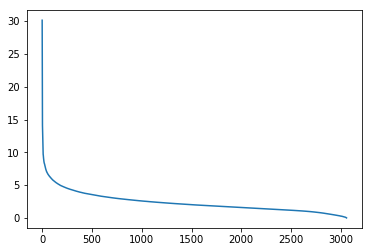

In [142]:
plt.plot(s)

In [152]:
singular_values = s
# el calculo total de la energia es igual a la suma 
# de los valores singulares al cuadrado
energy_total = sum(singular_values**2)
# de esta forma calculamos la cantidad de energia acumulada por
# cada valor singular
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
sum(sv_pow[:1700]) / energy_total

0.9124029863946008

In [153]:
d = u[:1700]

In [155]:
from sklearn.cluster import KMeans

In [157]:
kms = KMeans(n_clusters=2500, init='k-means++', verbose=1, n_jobs=-1)

In [160]:
ret = kms.fit(u[:, :1700])

Initialization complete
Initialization complete
Initialization complete
Initialization complete
start iteration
done sorting
end inner loop


JoblibMemoryError: JoblibMemoryError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/usr/lib/python3.5/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    179         sys.exit(msg)
    180     main_globals = sys.modules["__main__"].__dict__
    181     if alter_argv:
    182         sys.argv[0] = mod_spec.origin
    183     return _run_code(code, main_globals, None,
--> 184                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/dist-packages/ipykernel_launcher.py')
    185 
    186 def run_module(mod_name, init_globals=None,
    187                run_name=None, alter_sys=False):
    188     """Execute a module's code without importing it

...........................................................................
/usr/lib/python3.5/runpy.py in _run_code(code=<code object <module> at 0x7f964cf4ddb0, file "/...3.5/dist-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/local/lib/python3.5/dist-packages/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/dist-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/dist-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f964cf4ddb0, file "/...3.5/dist-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/usr/local/lib/python3.5/dist-packages/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/dist-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
/usr/lib/python3.5/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    340             raise RuntimeError('Event loop is running.')
    341         self._set_coroutine_wrapper(self._debug)
    342         self._thread_id = threading.get_ident()
    343         try:
    344             while True:
--> 345                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    346                 if self._stopping:
    347                     break
    348         finally:
    349             self._stopping = False

...........................................................................
/usr/lib/python3.5/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1307                         logger.warning('Executing %s took %.3f seconds',
   1308                                        _format_handle(handle), dt)
   1309                 finally:
   1310                     self._current_handle = None
   1311             else:
-> 1312                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(13, 1)>>
   1313         handle = None  # Needed to break cycles when an exception occurs.
   1314 
   1315     def _set_coroutine_wrapper(self, enabled):
   1316         try:

...........................................................................
/usr/lib/python3.5/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(13, 1)>)
    120             self._callback = None
    121             self._args = None
    122 
    123     def _run(self):
    124         try:
--> 125             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (13, 1)
    126         except Exception as exc:
    127             cb = _format_callback_source(self._callback, self._args)
    128             msg = 'Exception in callback {}'.format(cb)
    129             context = {

...........................................................................
/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=13, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'ret = kms.fit(u[:, :1700])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 1, 5, 22, 19, 268071, tzinfo=tzutc()), 'msg_id': '06a8b4591d5ae9cad64c50c6e5aa4c68', 'msg_type': 'execute_request', 'session': '4384e49c199e4e93205dce43f6fe1e70', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': '06a8b4591d5ae9cad64c50c6e5aa4c68', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'4384e49c199e4e93205dce43f6fe1e70']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'ret = kms.fit(u[:, :1700])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 1, 5, 22, 19, 268071, tzinfo=tzutc()), 'msg_id': '06a8b4591d5ae9cad64c50c6e5aa4c68', 'msg_type': 'execute_request', 'session': '4384e49c199e4e93205dce43f6fe1e70', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': '06a8b4591d5ae9cad64c50c6e5aa4c68', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'4384e49c199e4e93205dce43f6fe1e70'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'ret = kms.fit(u[:, :1700])', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 6, 1, 5, 22, 19, 268071, tzinfo=tzutc()), 'msg_id': '06a8b4591d5ae9cad64c50c6e5aa4c68', 'msg_type': 'execute_request', 'session': '4384e49c199e4e93205dce43f6fe1e70', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': '06a8b4591d5ae9cad64c50c6e5aa4c68', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='ret = kms.fit(u[:, :1700])', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'ret = kms.fit(u[:, :1700])'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('ret = kms.fit(u[:, :1700])',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('ret = kms.fit(u[:, :1700])',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='ret = kms.fit(u[:, :1700])', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'ret = kms.fit(u[:, :1700])'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='ret = kms.fit(u[:, :1700])', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>], cell_name='<ipython-input-160-4a1f1c7f4791>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f96049b28d0, executi...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f9604956780, file "<ipython-input-160-4a1f1c7f4791>", line 1>
        result = <ExecutionResult object at 7f96049b28d0, executi...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f9604956780, file "<ipython-input-160-4a1f1c7f4791>", line 1>, result=<ExecutionResult object at 7f96049b28d0, executi...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f9604956780, file "<ipython-input-160-4a1f1c7f4791>", line 1>
        self.user_global_ns = {'In': ['', "import pandas as pd\nimport numpy as np\n\nget_ipython().run_line_magic('matplotlib', 'inline')", "avisos_detalle = pd.read_csv('/home/luciano/orga.../datos_preprocesados/fiuba_6_avisos_detalle.csv')", "avisos_detalle = avisos_detalle.drop(axis=1, lab...laboral', 'nombre_area', 'denominacion_empresa'])", 'from sklearn.feature_extraction.text import TfidfVectorizer\nimport descripcion_parser as dp', "avisos_detalle['descripcion'] = avisos_detalle['descripcion'].map(dp.parse)", 'avisos_detalle', 's = sorted(palabras, key=palabras.get, reverse=True)', "palabras = {}\ndef sumar(x):\n    global palabras\n...return x\navisos_detalle['descripcion'].map(sumar)", 's = sorted(palabras, key=palabras.get, reverse=True)', 's', "palabras['ventas']", "palabras['administracion']", 's', 'def idf(t, docs):\n    frec = 0\n    for d in docs...s)\n\nterms_idf = {}\nfor term in term_frec_in_docs:', "from math import log10\n\ndef idf(t, docs):\n    ''... / term_frec_in_docs[term])\n\n# Fin cálculo de IDF", "from math import log10\n\ndef idf(t, docs):\n    ''... / term_frec_in_docs[term])\n\n# Fin cálculo de IDF", '# Cálculo de TF promedio para los avisos que con...m]\n    terms_tf[term] = suma_acum / cantidad_docs', 'term_tfidf = {}\nfor term in terms_tf:\n    term_tfidf[term] = terms_tf[term] * terms_idf[term]', 'term_tfidf', ...], 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'Out': {6:           idaviso                               ...          s u m a t e  

[25288 rows x 3 columns], 8: 0            interesado grupo marias ingresa dej....
Name: descripcion, Length: 25288, dtype: object, 10: ['ventas', 'administracion', 'time', 'comercial', 'productos', 'ingles', 'analisis', 'avanzado', 'secundario', 'preferentemente', 'sistemas', 'rubro', 'venta', 'conocimiento', 'compañia', 'carreras', 'ofrece', 'perfil', 'completo', 'candidatos', ...], 11: 6253, 12: 6161, 13: ['ventas', 'administracion', 'time', 'comercial', 'productos', 'ingles', 'analisis', 'avanzado', 'secundario', 'preferentemente', 'sistemas', 'rubro', 'venta', 'conocimiento', 'compañia', 'carreras', 'ofrece', 'perfil', 'completo', 'candidatos', ...], 19: {'aa': 0.008511077888698293, 'aaa': 0.004107811321065638, 'aac': 0.01047232446156723, 'aachen': 0.0028229887518373673, 'aad': 0.013678307990955707, 'aagroindustrial': 0.020700887572519172, 'aann': 0.010959293420745444, 'aap': 0.00909082251984868, 'aapresid': 0.00705899716089384, 'aarea': 0.0032411107717021615, ...}, 20: ['boosteo', 'ecommtest', 'ani', 'testestestestestestest', 'inspectora', 'camamero', 'vendendor', 'exstream', 'barman', 'depiladora', 'fracnes', 'tarabajos', 'joyas', 'aplia', 'sanfar', 'contactologa', 'uweuriuewiurhweiufhwi', 'euhfiuewjfoiewfef', 'responable', 'twerui', ...], 22: ['boosteo', 'ecommtest', 'ani', 'testestestestestestest', 'inspectora', 'camamero', 'vendendor', 'barman', 'exstream', 'depiladora', 'fracnes', 'uca', 'tarabajos', 'joyas', 'aplia', 'sanfar', 'feria', 'contactologa', 'uweuriuewiurhweiufhwi', 'responable', ...], 23: ['deciding', 'occurring', 'unusually', 'evaluates', 'applies', 'damage', 'arounds', 'leaves', 'thereof', 'encourages', 'supplied', 'overtime', 'timesheet', 'instruction', 'recognise', 'meaning', 'strategically', 'appreciative', 'contingencies', 'authorisations', ...], ...}, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'UMBRAL_DOCS': 60, 'UMBRAL_DOCS_INF': 60, 'UMBRAL_DOCS_SUP': 20230, '_': 0.13041055301051588, '_10': ['ventas', 'administracion', 'time', 'comercial', 'productos', 'ingles', 'analisis', 'avanzado', 'secundario', 'preferentemente', 'sistemas', 'rubro', 'venta', 'conocimiento', 'compañia', 'carreras', 'ofrece', 'perfil', 'completo', 'candidatos', ...], '_101': 32944, ...}
        self.user_ns = {'In': ['', "import pandas as pd\nimport numpy as np\n\nget_ipython().run_line_magic('matplotlib', 'inline')", "avisos_detalle = pd.read_csv('/home/luciano/orga.../datos_preprocesados/fiuba_6_avisos_detalle.csv')", "avisos_detalle = avisos_detalle.drop(axis=1, lab...laboral', 'nombre_area', 'denominacion_empresa'])", 'from sklearn.feature_extraction.text import TfidfVectorizer\nimport descripcion_parser as dp', "avisos_detalle['descripcion'] = avisos_detalle['descripcion'].map(dp.parse)", 'avisos_detalle', 's = sorted(palabras, key=palabras.get, reverse=True)', "palabras = {}\ndef sumar(x):\n    global palabras\n...return x\navisos_detalle['descripcion'].map(sumar)", 's = sorted(palabras, key=palabras.get, reverse=True)', 's', "palabras['ventas']", "palabras['administracion']", 's', 'def idf(t, docs):\n    frec = 0\n    for d in docs...s)\n\nterms_idf = {}\nfor term in term_frec_in_docs:', "from math import log10\n\ndef idf(t, docs):\n    ''... / term_frec_in_docs[term])\n\n# Fin cálculo de IDF", "from math import log10\n\ndef idf(t, docs):\n    ''... / term_frec_in_docs[term])\n\n# Fin cálculo de IDF", '# Cálculo de TF promedio para los avisos que con...m]\n    terms_tf[term] = suma_acum / cantidad_docs', 'term_tfidf = {}\nfor term in terms_tf:\n    term_tfidf[term] = terms_tf[term] * terms_idf[term]', 'term_tfidf', ...], 'KMeans': <class 'sklearn.cluster.k_means_.KMeans'>, 'Out': {6:           idaviso                               ...          s u m a t e  

[25288 rows x 3 columns], 8: 0            interesado grupo marias ingresa dej....
Name: descripcion, Length: 25288, dtype: object, 10: ['ventas', 'administracion', 'time', 'comercial', 'productos', 'ingles', 'analisis', 'avanzado', 'secundario', 'preferentemente', 'sistemas', 'rubro', 'venta', 'conocimiento', 'compañia', 'carreras', 'ofrece', 'perfil', 'completo', 'candidatos', ...], 11: 6253, 12: 6161, 13: ['ventas', 'administracion', 'time', 'comercial', 'productos', 'ingles', 'analisis', 'avanzado', 'secundario', 'preferentemente', 'sistemas', 'rubro', 'venta', 'conocimiento', 'compañia', 'carreras', 'ofrece', 'perfil', 'completo', 'candidatos', ...], 19: {'aa': 0.008511077888698293, 'aaa': 0.004107811321065638, 'aac': 0.01047232446156723, 'aachen': 0.0028229887518373673, 'aad': 0.013678307990955707, 'aagroindustrial': 0.020700887572519172, 'aann': 0.010959293420745444, 'aap': 0.00909082251984868, 'aapresid': 0.00705899716089384, 'aarea': 0.0032411107717021615, ...}, 20: ['boosteo', 'ecommtest', 'ani', 'testestestestestestest', 'inspectora', 'camamero', 'vendendor', 'exstream', 'barman', 'depiladora', 'fracnes', 'tarabajos', 'joyas', 'aplia', 'sanfar', 'contactologa', 'uweuriuewiurhweiufhwi', 'euhfiuewjfoiewfef', 'responable', 'twerui', ...], 22: ['boosteo', 'ecommtest', 'ani', 'testestestestestestest', 'inspectora', 'camamero', 'vendendor', 'barman', 'exstream', 'depiladora', 'fracnes', 'uca', 'tarabajos', 'joyas', 'aplia', 'sanfar', 'feria', 'contactologa', 'uweuriuewiurhweiufhwi', 'responable', ...], 23: ['deciding', 'occurring', 'unusually', 'evaluates', 'applies', 'damage', 'arounds', 'leaves', 'thereof', 'encourages', 'supplied', 'overtime', 'timesheet', 'instruction', 'recognise', 'meaning', 'strategically', 'appreciative', 'contingencies', 'authorisations', ...], ...}, 'TfidfVectorizer': <class 'sklearn.feature_extraction.text.TfidfVectorizer'>, 'UMBRAL_DOCS': 60, 'UMBRAL_DOCS_INF': 60, 'UMBRAL_DOCS_SUP': 20230, '_': 0.13041055301051588, '_10': ['ventas', 'administracion', 'time', 'comercial', 'productos', 'ingles', 'analisis', 'avanzado', 'secundario', 'preferentemente', 'sistemas', 'rubro', 'venta', 'conocimiento', 'compañia', 'carreras', 'ofrece', 'perfil', 'completo', 'candidatos', ...], '_101': 32944, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/home/luciano/Dropbox/UBA/Organización de Datos/tp2-orga-datos-1c2018/<ipython-input-160-4a1f1c7f4791> in <module>()
----> 1 ret = kms.fit(u[:, :1700])

...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/cluster/k_means_.py in fit(self=KMeans(algorithm='auto', copy_x=True, init='k-me...o',
    random_state=None, tol=0.0001, verbose=1), X=array([[-0.00166536,  0.00014108,  0.00177818, ....  0.00041713,
         0.00121065,  0.00416171]]), y=None)
    891                 X, n_clusters=self.n_clusters, init=self.init,
    892                 n_init=self.n_init, max_iter=self.max_iter, verbose=self.verbose,
    893                 precompute_distances=self.precompute_distances,
    894                 tol=self.tol, random_state=random_state, copy_x=self.copy_x,
    895                 n_jobs=self.n_jobs, algorithm=self.algorithm,
--> 896                 return_n_iter=True)
    897         return self
    898 
    899     def fit_predict(self, X, y=None):
    900         """Compute cluster centers and predict cluster index for each sample.

...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/cluster/k_means_.py in k_means(X=array([[ 0.00365   , -0.00258676,  0.0019445 , ....  0.00041986,
         0.00121566,  0.00414595]]), n_clusters=2500, init='k-means++', precompute_distances=False, n_init=10, max_iter=300, verbose=1, tol=3.952176185099422e-09, random_state=<mtrand.RandomState object>, copy_x=True, n_jobs=-1, algorithm='elkan', return_n_iter=True)
    358                                    verbose=verbose, tol=tol,
    359                                    precompute_distances=precompute_distances,
    360                                    x_squared_norms=x_squared_norms,
    361                                    # Change seed to ensure variety
    362                                    random_state=seed)
--> 363             for seed in seeds)
        seeds = array([2095581973,  901659154,   29409265, 16957... 1229278039, 1491964206, 1528345714, 1375117225])
    364         # Get results with the lowest inertia
    365         labels, inertia, centers, n_iters = zip(*results)
    366         best = np.argmin(inertia)
    367         best_labels = labels[best]

...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object k_means.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
MemoryError                                        Fri Jun  1 03:12:19 2018
PID: 3761                                    Python 3.5.2: /usr/bin/python3
...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _kmeans_single_elkan>, (memmap([[ 0.00365   , -0.00258676,  0.0019445 , ... 0.00041986,
          0.00121566,  0.00414595]]), 2500), {'init': 'k-means++', 'max_iter': 300, 'precompute_distances': False, 'random_state': 2095581973, 'tol': 3.952176185099422e-09, 'verbose': 1, 'x_squared_norms': array([0.07990761, 0.06886867, 0.0653565 , ..., 0.05813112, 0.06344167,
       0.08672894])})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _kmeans_single_elkan>
        args = (memmap([[ 0.00365   , -0.00258676,  0.0019445 , ... 0.00041986,
          0.00121566,  0.00414595]]), 2500)
        kwargs = {'init': 'k-means++', 'max_iter': 300, 'precompute_distances': False, 'random_state': 2095581973, 'tol': 3.952176185099422e-09, 'verbose': 1, 'x_squared_norms': array([0.07990761, 0.06886867, 0.0653565 , ..., 0.05813112, 0.06344167,
       0.08672894])}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/cluster/k_means_.py in _kmeans_single_elkan(X=array([[ 0.00365   , -0.00258676,  0.0019445 , ....  0.00041986,
         0.00121566,  0.00414595]]), n_clusters=2500, max_iter=300, init='k-means++', verbose=1, x_squared_norms=array([0.07990761, 0.06886867, 0.0653565 , ..., 0.05813112, 0.06344167,
       0.08672894]), random_state=<mtrand.RandomState object>, tol=3.952176185099422e-09, precompute_distances=False)
    395                               x_squared_norms=x_squared_norms)
    396     centers = np.ascontiguousarray(centers)
    397     if verbose:
    398         print('Initialization complete')
    399     centers, labels, n_iter = k_means_elkan(X, n_clusters, centers, tol=tol,
--> 400                                             max_iter=max_iter, verbose=verbose)
        max_iter = 300
        verbose = 1
    401     inertia = np.sum((X - centers[labels]) ** 2, dtype=np.float64)
    402     return labels, inertia, centers, n_iter
    403 
    404 

...........................................................................
/usr/local/lib/python3.5/dist-packages/sklearn/cluster/_k_means_elkan.cpython-35m-x86_64-linux-gnu.so in sklearn.cluster._k_means_elkan.k_means_elkan()

MemoryError: 
___________________________________________________________________________

array([[-0.00166536,  0.00014108,  0.00177818, ...,  0.00153878,
        -0.00072532,  0.00141461],
       [-0.003871  ,  0.00139863, -0.00453503, ..., -0.00201181,
        -0.00125611,  0.00021499],
       [-0.00386726,  0.0013335 , -0.00353849, ..., -0.00194991,
        -0.00200663,  0.00019489],
       ...,
       [-0.00294876,  0.00271863, -0.00367122, ..., -0.00675567,
         0.00305281, -0.00388754],
       [-0.00490179,  0.00465677, -0.00326048, ..., -0.00013195,
        -0.01651197,  0.00487751],
       [-0.00392766,  0.00387222,  0.00061966, ..., -0.00122805,
        -0.03019276,  0.00179769]])